<a href="https://colab.research.google.com/github/Otgonbtr/Dive_into_code/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if the bias term is not included
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record losses
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val, y_val, no_bias=False, verbose=False ):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.no_bias == True:
	          bias = np.ones((X.shape[0], 1))
	          X = np.hstack((bias, X))
	          bias = np.ones((X_val.shape[0], 1))
	          X_val = np.hstack((bias, X_val))
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        for i in range(self.iter):
            pred = self.linear_hypothesis(X)
            pred_val = self.linear_hypothesis(X_val)
            self._gradient_descent(X, y)
            loss = self._loss_func(pred, y)
            self.loss = np.append(self.loss, loss)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss = np.append(self.val_loss, loss_val)
            if verbose == True:
              print('{} learning loss is {}'.format(i,loss))
    

    def linear_hypothesis(self, X):
        """
        仮定関数の出力を計算する
          Parameters
          ----------
          X : 次の形のndarray, shape (n_samples, n_features)
            訓練データ
          Returns
          -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
          """
        pred = X @ self.theta
        return pred


    def _gradient_descent(self,X,y):
        """
        最急降下法によるパラメータの更新値計算
        """
        m = X.shape[0]
        n = X.shape[1]
        pred = self.linear_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
              gradient += (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * (gradient / m)
        
    def predict(self, X,no_bias=False):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.no_bias == True:
            bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([bias, X])
        pred_y = self.linear_hypothesis(X)
        return pred_y

        


    def _mse(self,y_pred,y,X):
        """
        平均二乗誤差の計算
        """
        mse = ((y_pred - y) ** 2).sum() / X.shape[0]
        return mse

    def _loss_func(self,y_pred,y):
        """
        損失関数
        """
        loss = self._mse(y_pred, y,X)/2
        return loss

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
slr = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test, verbose=True)

In [ ]:
pred = slr.predict(X_test)
conflict = mean_squared_error(y_test, pred)
print("MSE of ScratchLinearRegression:{}".format(conflict))


reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)
conflict = mean_squared_error(y_test, pred)
print("MSE of sklearn Linear Regression:{}".format(conflict))

MSE of ScratchLinearRegression:1796867628.5140812
MSE of sklearn Linear Regression:1796799357.5447416


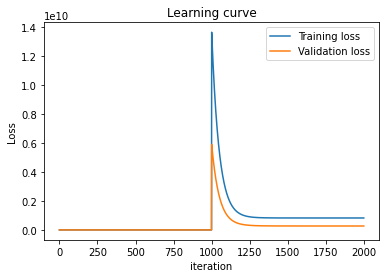

In [ ]:
#--------Problem 7-----------#
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss, label = 'Training loss')
plt.plot(slr.val_loss, label = 'Validation loss')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Learning curve')
plt.show()